In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('emg_all_features_labeled.csv')
df.head()

,standard_deviation 1,standard_deviation 2,standard_deviation 3,standard_deviation 4,standard_deviation 5,standard_deviation 6,standard_deviation 7,standard_deviation 8,root_mean_square 1,root_mean_square 2,...,wave_form_length 8,willison_amplitude 1,willison_amplitude 2,willison_amplitude 3,willison_amplitude 4,willison_amplitude 5,willison_amplitude 6,willison_amplitude 7,willison_amplitude 8,labels
0,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.3516,2,3,6,0,0,1,1,0,1
1,0.035060,0.025699,0.025286,0.020039,0.012505,0.016996,0.017674,0.014974,0.036073,0.027496,...,2.3906,3,2,2,2,0,0,1,1,1
2,0.043982,0.033187,0.071985,0.018900,0.016712,0.025793,0.025291,0.020268,0.044961,0.034351,...,2.7813,3,2,4,0,1,2,1,2,1
3,0.032677,0.031038,0.033345,0.020213,0.016290,0.028113,0.027834,0.019944,0.033778,0.032369,...,2.4141,2,1,1,0,0,2,2,1,1
4,0.032101,0.029580,0.035939,0.037279,0.014564,0.022579,0.018042,0.015792,0.033035,0.030936,...,2.3516,2,1,6,4,0,1,0,0,1


In [3]:
print(df.shape)

(6823, 81)


In [4]:
features = df.drop(columns=["labels"])
print (features.shape)
features.head()

(6823, 80)


,standard_deviation 1,standard_deviation 2,standard_deviation 3,standard_deviation 4,standard_deviation 5,standard_deviation 6,standard_deviation 7,standard_deviation 8,root_mean_square 1,root_mean_square 2,...,wave_form_length 7,wave_form_length 8,willison_amplitude 1,willison_amplitude 2,willison_amplitude 3,willison_amplitude 4,willison_amplitude 5,willison_amplitude 6,willison_amplitude 7,willison_amplitude 8
0,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.8047,2.3516,2,3,6,0,0,1,1,0
1,0.035060,0.025699,0.025286,0.020039,0.012505,0.016996,0.017674,0.014974,0.036073,0.027496,...,2.5859,2.3906,3,2,2,2,0,0,1,1
2,0.043982,0.033187,0.071985,0.018900,0.016712,0.025793,0.025291,0.020268,0.044961,0.034351,...,3.4609,2.7813,3,2,4,0,1,2,1,2
3,0.032677,0.031038,0.033345,0.020213,0.016290,0.028113,0.027834,0.019944,0.033778,0.032369,...,3.5859,2.4141,2,1,1,0,0,2,2,1
4,0.032101,0.029580,0.035939,0.037279,0.014564,0.022579,0.018042,0.015792,0.033035,0.030936,...,2.7891,2.3516,2,1,6,4,0,1,0,0


In [5]:
Classes = df["labels"]
print(Classes.shape)
print("class :", Classes.unique())
print("Value Count :\n",Classes.value_counts())

(6823,)
class : [1 2 3 4 5 6 7]
Value Count :
 4    1084
3    1045
1    1040
2    1017
5    1016
7     895
6     726
Name: labels, dtype: int64


In [6]:
features_2D = features.to_numpy().reshape(6823, 10, 8)

print (features_2D.shape)

np.set_printoptions(linewidth=200)
print (features_2D[0])

(6823, 10, 8)
[[ 2.9437e-02  5.1465e-02  8.9432e-02  1.6893e-02  1.4127e-02  1.7735e-02  1.9645e-02  1.4079e-02]
 [ 3.0692e-02  5.2209e-02  8.9770e-02  1.9609e-02  1.6973e-02  2.0182e-02  2.1575e-02  1.7081e-02]
 [-1.6406e-01 -2.8906e-01 -5.3906e-01 -5.4688e-02 -5.4688e-02 -1.1719e-01 -1.2500e-01 -5.4688e-02]
 [ 9.3750e-02  1.6406e-01  3.1250e-01  3.1250e-02  3.9063e-02  4.6875e-02  6.2500e-02  3.1250e-02]
 [ 5.3000e+01  4.9000e+01  5.6000e+01  3.9000e+01  2.1000e+01  2.7000e+01  3.1000e+01  2.3000e+01]
 [ 7.4323e-02  1.1297e-01  2.1297e-01  5.0417e-02  3.9271e-02  4.7031e-02  5.0990e-02  3.6354e-02]
 [ 3.1250e-02  5.4688e-02  3.1250e-02  3.9063e-02  3.1250e-02  4.6875e-02  2.3438e-02  2.3438e-02]
 [ 1.7896e-02  2.6660e-02  4.5660e-02  1.3029e-02  1.0639e-02  1.1585e-02  1.1896e-02  1.0152e-02]
 [ 4.3672e+00  6.6563e+00  1.1773e+01  2.9219e+00  2.3594e+00  2.6797e+00  2.8047e+00  2.3516e+00]
 [ 2.0000e+00  3.0000e+00  6.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00  1.0000e+00  0.0000e+

In [7]:
standard_deviation       = features_2D[:, 0]
root_mean_square         = features_2D[:, 1]
minimum                  = features_2D[:, 2]
maximum                  = features_2D[:, 3] 
zero_crossings           = features_2D[:, 4] 
average_amplitude_change = features_2D[:, 5] 
amplitude_first_burst    = features_2D[:, 6] 
mean_absolute_value      = features_2D[:, 7] 
wave_form_length         = features_2D[:, 8] 
willison_amplitude       = features_2D[:, 9] 



print (standard_deviation[0])
print (root_mean_square[0])
print (minimum[0])
print (maximum[0])
print (zero_crossings[0])
print (average_amplitude_change[0])
print (amplitude_first_burst[0])
print (mean_absolute_value[0])
print (wave_form_length[0])
print (willison_amplitude[0])

[0.029437 0.051465 0.089432 0.016893 0.014127 0.017735 0.019645 0.014079]
[0.030692 0.052209 0.08977  0.019609 0.016973 0.020182 0.021575 0.017081]
[-0.16406  -0.28906  -0.53906  -0.054688 -0.054688 -0.11719  -0.125    -0.054688]
[0.09375  0.16406  0.3125   0.03125  0.039063 0.046875 0.0625   0.03125 ]
[53. 49. 56. 39. 21. 27. 31. 23.]
[0.074323 0.11297  0.21297  0.050417 0.039271 0.047031 0.05099  0.036354]
[0.03125  0.054688 0.03125  0.039063 0.03125  0.046875 0.023438 0.023438]
[0.017896 0.02666  0.04566  0.013029 0.010639 0.011585 0.011896 0.010152]
[ 4.3672  6.6563 11.773   2.9219  2.3594  2.6797  2.8047  2.3516]
[2. 3. 6. 0. 0. 1. 1. 0.]


In [8]:
# Normalizing data

mean_standard_deviation        = standard_deviation.mean(axis=0)
mean_root_mean_square          = root_mean_square.mean(axis=0)        
mean_minimum                   = minimum.mean(axis=0)                 
mean_maximum                   = maximum.mean(axis=0)                 
mean_zero_crossings            = zero_crossings.mean(axis=0)          
mean_average_amplitude_change  = average_amplitude_change.mean(axis=0)
mean_amplitude_first_burst     = amplitude_first_burst.mean(axis=0)   
mean_mean_absolute_value       = mean_absolute_value.mean(axis=0)     
mean_wave_form_length          = wave_form_length.mean(axis=0)        
mean_willison_amplitude        = willison_amplitude.mean(axis=0) 


std_standard_deviation        = standard_deviation.std(axis=0)
std_root_mean_square          = root_mean_square.std(axis=0)        
std_minimum                   = minimum.std(axis=0)                 
std_maximum                   = maximum.std(axis=0)                 
std_zero_crossings            = zero_crossings.std(axis=0)          
std_average_amplitude_change  = average_amplitude_change.std(axis=0)
std_amplitude_first_burst     = amplitude_first_burst.std(axis=0)   
std_mean_absolute_value       = mean_absolute_value.std(axis=0)     
std_wave_form_length          = wave_form_length.std(axis=0)        
std_willison_amplitude        = willison_amplitude.std(axis=0) 




features_2D[:, 0] -= mean_standard_deviation       
features_2D[:, 1] -= mean_root_mean_square        
features_2D[:, 2] -= mean_minimum                 
features_2D[:, 3] -= mean_maximum                 
features_2D[:, 4] -= mean_zero_crossings          
features_2D[:, 5] -= mean_average_amplitude_change
features_2D[:, 6] -= mean_amplitude_first_burst   
features_2D[:, 7] -= mean_mean_absolute_value     
features_2D[:, 8] -= mean_wave_form_length        
features_2D[:, 9] -= mean_willison_amplitude      


features_2D[:, 0] /= std_standard_deviation      
features_2D[:, 1] /= std_root_mean_square        
features_2D[:, 2] /= std_minimum                 
features_2D[:, 3] /= std_maximum                 
features_2D[:, 4] /= std_zero_crossings          
features_2D[:, 5] /= std_average_amplitude_change
features_2D[:, 6] /= std_amplitude_first_burst   
features_2D[:, 7] /= std_mean_absolute_value     
features_2D[:, 8] /= std_wave_form_length        
features_2D[:, 9] /= std_willison_amplitude      

In [9]:
print (features_2D.shape)

np.set_printoptions(linewidth=200)
print (features_2D[0])

(6823, 10, 8)
[[-0.29189023 -0.25191671 -0.08613521 -0.65566625 -0.61323086 -0.61352601 -0.72730548 -0.60202938]
 [-0.30783628 -0.26322095 -0.09384336 -0.63844836 -0.61401414 -0.60452651 -0.72650308 -0.59077908]
 [-0.00809836 -0.1314963  -0.69218857  0.68965099  0.56935344  0.39456948  0.70967683  0.67667698]
 [-0.25750912 -0.25132621  0.04926987 -0.74272553 -0.49550637 -0.64063277 -0.81930528 -0.67416828]
 [ 0.09345467 -0.54672514 -0.47713647 -0.73464389 -1.23177392 -1.18320632 -0.93650122 -1.07555052]
 [-0.36481304 -0.44747509 -0.21882158 -0.63819656 -0.65764872 -0.64488428 -0.70423805 -0.59867394]
 [-0.51656671 -0.42147479 -0.77956134 -0.56628295 -0.36233438 -0.05491637 -0.44183743 -0.39060007]
 [-0.39851747 -0.47605207 -0.33448906 -0.64017737 -0.65401898 -0.64383222 -0.68482171 -0.57244755]
 [-0.36792412 -0.4443429  -0.29326345 -0.64535227 -0.64471503 -0.64743969 -0.68871169 -0.56754114]
 [-0.01881107 -0.26133552  0.26246623 -0.69071029 -0.51214124 -0.46961345 -0.80716125 -0.763435

In [10]:
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(features_2D, Classes, test_size=0.2, random_state=1)

In [11]:
print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(5458, 10, 8)
(5458,)
(1365, 10, 8)
(1365,)


In [12]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(5458, 10, 8)
(5458, 8)
(1365, 10, 8)
(1365, 8)


In [13]:
x_train = x_train.reshape(5458, 10, 8, 1)

x_test = x_test.reshape(1365, 10, 8, 1)
                          
                          
print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(5458, 10, 8, 1)
(5458, 8)
(1365, 10, 8, 1)
(1365, 8)


In [2]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(10, 8, 1)),
  #tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 6, 64)          640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1032      
Total params: 235,336
Trainable params: 235,336
Non-trainable params: 0
_________________________________________________________________


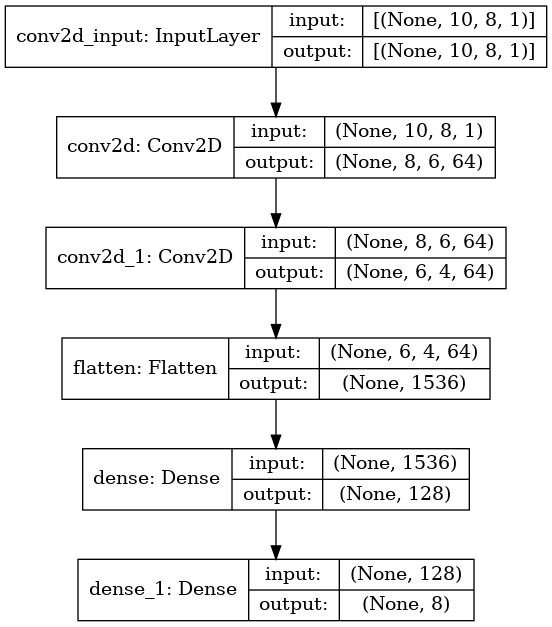

In [3]:
dot_img_file = '/tmp/model_1.png'

tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [15]:
import os

checkpoint_path = "ModelCheckpoint/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(x_train, y_train,
                    batch_size = 16, 
                    epochs = 15,
                    validation_data=(x_test, y_test),
                    callbacks=[cp_callback])

Epoch 1/15
342/342 [==============================] - 4s 9ms/step - loss: 0.8347 - accuracy: 0.7011 - val_loss: 0.3298 - val_accuracy: 0.8850

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/15
342/342 [==============================] - 2s 7ms/step - loss: 0.2797 - accuracy: 0.8990 - val_loss: 0.2549 - val_accuracy: 0.9143

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/15
342/342 [==============================] - 3s 8ms/step - loss: 0.1996 - accuracy: 0.9336 - val_loss: 0.2731 - val_accuracy: 0.9084

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/15
342/342 [==============================] - 3s 8ms/step - loss: 0.1427 - accuracy: 0.9496 - val_loss: 0.2633 - val_accuracy: 0.9223

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/15
342/342 [==============================] - 3s 8ms/step - loss: 0.1362 - accuracy: 0.9511 - val_loss: 0.2307 - val_accuracy: 0.9385

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/15
342/342 [=========================

Text(0.5, 1.0, 'Training and validation loss')

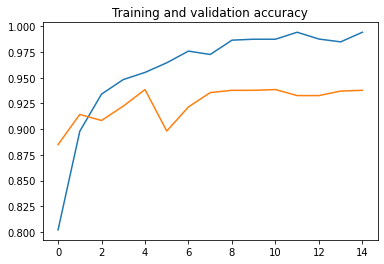

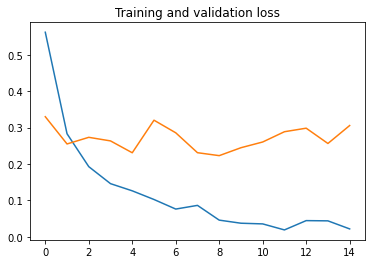

In [16]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [17]:
loss, acc = model.evaluate(x_test, y_test, batch_size = 32)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

43/43 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.9377
Test loss : 0.3055308163166046
Test accuracy : 93.77289414405823 %


In [18]:
import time
start_time = time.time()

print("Predicted Class: ", np.argmax(model.predict(x_test)[50]))
print("Actual Class: ", np.argmax(y_test[50]))


print("--- %s seconds ---" % (time.time() - start_time))

Predicted Class:  3
Actual Class:  3
--- 0.175872802734375 seconds ---


In [24]:
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

# Model configuration
batch_size = 16
no_epochs = 15
num_folds = 5


# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = x_train.astype('float32')
input_test = x_test.astype('float32')


# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(10, 8, 1)),
      #tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(8, activation='softmax')
    ])


    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    
    # Fit data to model
    history = model.fit(inputs[train], targets[train],
                        batch_size=batch_size,
                        epochs=no_epochs,
                        callbacks=[cp_callback])

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
342/342 [==============================] - 2s 4ms/step - loss: 0.8959 - accuracy: 0.6918

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/15
342/342 [==============================] - 1s 4ms/step - loss: 0.3197 - accuracy: 0.8912

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/15
342/342 [==============================] - 1s 4ms/step - loss: 0.2129 - accuracy: 0.9316

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/15
342/342 [==============================] - 1s 4ms/step - loss: 0.2250 - accuracy: 0.9286

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/15
342/342 [==============================] - 1s 4ms/step - loss: 0.1419 - accuracy: 0.9545

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0961 - accuracy: 0.9672

Epoch 00006: saving model to training_1/cp.ckpt
Epoch 7/1

Epoch 7/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0840 - accuracy: 0.9713

Epoch 00007: saving model to training_1/cp.ckpt
Epoch 8/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0664 - accuracy: 0.9796

Epoch 00008: saving model to training_1/cp.ckpt
Epoch 9/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0645 - accuracy: 0.9767

Epoch 00009: saving model to training_1/cp.ckpt
Epoch 10/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.9881

Epoch 00010: saving model to training_1/cp.ckpt
Epoch 11/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.9934

Epoch 00011: saving model to training_1/cp.ckpt
Epoch 12/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9878

Epoch 00012: saving model to training_1/cp.ckpt
Epoch 13/15
342/342 [==============================] - 1s 4ms/step - loss: 0.0338 - accuracy: 0.9882

E

In [27]:
import time
start_time = time.time()

print("Predicted Class: ", np.argmax(model.predict(x_test)[50]))
print("Actual Class: ", np.argmax(y_test[50]))


print("--- %s seconds ---" % (time.time() - start_time))

Predicted Class:  3
Actual Class:  3
--- 0.16869854927062988 seconds ---


In [28]:
trained_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(10, 8, 1)),
  #tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(8, activation='softmax')
])


trained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
trained_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 8, 6, 64)          640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 4, 64)          36928     
_________________________________________________________________
flatten_16 (Flatten)         (None, 1536)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               196736    
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 1032      
Total params: 235,336
Trainable params: 235,336
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Loads the weights
trained_model.load_weights('training_1/cp.ckpt')

In [36]:
# Re-evaluate the model
loss, acc = trained_model.evaluate(inputs[test], targets[test], verbose=1)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

43/43 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9553
Test loss : 0.2104572355747223
Test accuracy : 95.52785754203796 %


In [37]:
import time
start_time = time.time()

print("Predicted Class: ", np.argmax(trained_model.predict(x_test)[50]))
print("Actual Class: ", np.argmax(y_test[50]))


print("--- %s seconds ---" % (time.time() - start_time))

Predicted Class:  3
Actual Class:  3
--- 0.1859264373779297 seconds ---


In [10]:
standard_deviation = df[["standard_deviation 1","standard_deviation 2", "standard_deviation 3", "standard_deviation 4", 
                         "standard_deviation 5", "standard_deviation 6", "standard_deviation 7", "standard_deviation 8"]]
print(standard_deviation.shape)
standard_deviation.head()

(6823, 8)


,standard_deviation 1,standard_deviation 2,standard_deviation 3,standard_deviation 4,standard_deviation 5,standard_deviation 6,standard_deviation 7,standard_deviation 8
0,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079
1,0.035060,0.025699,0.025286,0.020039,0.012505,0.016996,0.017674,0.014974
2,0.043982,0.033187,0.071985,0.018900,0.016712,0.025793,0.025291,0.020268
3,0.032677,0.031038,0.033345,0.020213,0.016290,0.028113,0.027834,0.019944
4,0.032101,0.029580,0.035939,0.037279,0.014564,0.022579,0.018042,0.015792


In [11]:
root_mean_square = df[["root_mean_square 1", "root_mean_square 2", "root_mean_square 3", "root_mean_square 4", 
                       "root_mean_square 5", "root_mean_square 6", "root_mean_square 7", "root_mean_square 8"]]
print(root_mean_square.shape)
root_mean_square.head()

(6823, 8)


,root_mean_square 1,root_mean_square 2,root_mean_square 3,root_mean_square 4,root_mean_square 5,root_mean_square 6,root_mean_square 7,root_mean_square 8
0,0.030692,0.052209,0.089770,0.019609,0.016973,0.020182,0.021575,0.017081
1,0.036073,0.027496,0.027370,0.022152,0.015690,0.019411,0.019692,0.017792
2,0.044961,0.034351,0.072402,0.021041,0.019401,0.027206,0.026631,0.022381
3,0.033778,0.032369,0.035020,0.022353,0.019041,0.029529,0.029120,0.021376
4,0.033035,0.030936,0.037391,0.038332,0.017597,0.024399,0.019908,0.018110


In [13]:
minimum = df[["Minimum 1", "Minimum 2", "Minimum 3", "Minimum 4", 
              "Minimum 5", "Minimum 6", "Minimum 7", "Minimum 8"]]
print(minimum.shape)
minimum.head()

(6823, 8)


,Minimum 1,Minimum 2,Minimum 3,Minimum 4,Minimum 5,Minimum 6,Minimum 7,Minimum 8
0,-0.16406,-0.28906,-0.53906,-0.054688,-0.054688,-0.117190,-0.125000,-0.054688
1,-0.19531,-0.20313,-0.14844,-0.085938,-0.046875,-0.085938,-0.101560,-0.093750
2,-0.39844,-0.21875,-0.59375,-0.085938,-0.101560,-0.140630,-0.101560,-0.140630
3,-0.23438,-0.15625,-0.19531,-0.062500,-0.078125,-0.125000,-0.132810,-0.125000
4,-0.15625,-0.15625,-0.15625,-0.156250,-0.070313,-0.101560,-0.078125,-0.070313


In [18]:
Maximum = df[["Maximum 1", "Maximum 2", "Maximum 3", "Maximum 4", 
              "Maximum 5", "Maximum 6", "Maximum 7", "Maximum 8"]]
print(Maximum.shape)
Maximum.head()

(6823, 8)


,Maximum 1,Maximum 2,Maximum 3,Maximum 4,Maximum 5,Maximum 6,Maximum 7,Maximum 8
0,0.09375,0.164060,0.31250,0.031250,0.039063,0.046875,0.06250,0.031250
1,0.21875,0.070313,0.10156,0.093750,0.039063,0.039063,0.06250,0.039063
2,0.14844,0.101560,0.40625,0.078125,0.062500,0.156250,0.15625,0.109380
3,0.10938,0.085938,0.12500,0.078125,0.046875,0.132810,0.14063,0.062500
4,0.11719,0.109380,0.15625,0.242190,0.031250,0.085938,0.06250,0.046875


In [19]:
zero_crossings = df[["zero_crossings 1", "zero_crossings 2", "zero_crossings 3", "zero_crossings 4", 
                     "zero_crossings 5", "zero_crossings 6", "zero_crossings 7", "zero_crossings 8"]]
print(zero_crossings.shape)
zero_crossings.head()

(6823, 8)


,zero_crossings 1,zero_crossings 2,zero_crossings 3,zero_crossings 4,zero_crossings 5,zero_crossings 6,zero_crossings 7,zero_crossings 8
0,53,49,56,39,21,27,31,23
1,47,49,44,43,30,31,31,26
2,43,47,53,35,21,33,33,22
3,50,39,46,33,21,33,37,24
4,47,50,56,44,32,31,34,34


In [20]:
average_amplitude_change = df[["average_amplitude_change 1", "average_amplitude_change 2", 
                               "average_amplitude_change 3", "average_amplitude_change 4", 
                               "average_amplitude_change 5", "average_amplitude_change 6",
                               "average_amplitude_change 7", "average_amplitude_change 8"]]
print(average_amplitude_change.shape)
average_amplitude_change.head()

(6823, 8)


,average_amplitude_change 1,average_amplitude_change 2,average_amplitude_change 3,average_amplitude_change 4,average_amplitude_change 5,average_amplitude_change 6,average_amplitude_change 7,average_amplitude_change 8
0,0.074323,0.112970,0.212970,0.050417,0.039271,0.047031,0.050990,0.036354
1,0.084427,0.064271,0.064375,0.053802,0.036771,0.044271,0.045521,0.037448
2,0.087448,0.077500,0.155470,0.052500,0.043021,0.060000,0.056979,0.049792
3,0.074115,0.075260,0.091667,0.057656,0.041719,0.061667,0.061354,0.045312
4,0.076979,0.082083,0.099375,0.093594,0.038698,0.049375,0.044375,0.039167


In [21]:
amplitude_first_burst = df[["amplitude_first_burst 1", "amplitude_first_burst 2", 
                            "amplitude_first_burst 3", "amplitude_first_burst 4", 
                            "amplitude_first_burst 5", "amplitude_first_burst 6",
                            "amplitude_first_burst 7", "amplitude_first_burst 8"]]
print(amplitude_first_burst.shape)
amplitude_first_burst.head()

(6823, 8)


,amplitude_first_burst 1,amplitude_first_burst 2,amplitude_first_burst 3,amplitude_first_burst 4,amplitude_first_burst 5,amplitude_first_burst 6,amplitude_first_burst 7,amplitude_first_burst 8
0,0.031250,0.054688,0.031250,0.039063,0.031250,0.046875,0.023438,0.023438
1,0.046875,0.031250,0.039063,0.039063,0.031250,0.023438,0.023438,0.015625
2,0.046875,0.023438,0.039063,0.054688,0.031250,0.023438,0.015625,0.023438
3,0.062500,0.039063,0.054688,0.039063,0.023438,0.031250,0.039063,0.015625
4,0.046875,0.031250,0.031250,0.031250,0.015625,0.031250,0.023438,0.031250


In [22]:
mean_absolute_value = df[["mean_absolute_value 1", "mean_absolute_value 2", 
                          "mean_absolute_value 3", "mean_absolute_value 4", 
                          "mean_absolute_value 5", "mean_absolute_value 6",
                          "mean_absolute_value 7", "mean_absolute_value 8"]]
print(mean_absolute_value.shape)
mean_absolute_value.head()

(6823, 8)


,mean_absolute_value 1,mean_absolute_value 2,mean_absolute_value 3,mean_absolute_value 4,mean_absolute_value 5,mean_absolute_value 6,mean_absolute_value 7,mean_absolute_value 8
0,0.017896,0.026660,0.045660,0.013029,0.010639,0.011585,0.011896,0.010152
1,0.018753,0.015962,0.015830,0.013603,0.009262,0.012231,0.011045,0.010408
2,0.020696,0.019960,0.031064,0.012604,0.010999,0.013546,0.013979,0.011354
3,0.018844,0.018915,0.021465,0.015071,0.011445,0.016604,0.016042,0.011526
4,0.020396,0.019417,0.023319,0.021162,0.010621,0.013417,0.012050,0.010544


In [23]:
wave_form_length = df[["wave_form_length 1", "wave_form_length 2", 
                       "wave_form_length 3", "wave_form_length 4", 
                       "wave_form_length 5", "wave_form_length 6",
                       "wave_form_length 7", "wave_form_length 8"]]
print(wave_form_length.shape)
wave_form_length.head()

(6823, 8)


,wave_form_length 1,wave_form_length 2,wave_form_length 3,wave_form_length 4,wave_form_length 5,wave_form_length 6,wave_form_length 7,wave_form_length 8
0,4.3672,6.6563,11.7730,2.9219,2.3594,2.6797,2.8047,2.3516
1,4.5156,3.7109,3.6406,3.0547,2.0391,2.9375,2.5859,2.3906
2,5.1953,4.9375,8.2813,2.7969,2.3125,3.4297,3.4609,2.7813
3,4.1797,4.3125,5.1484,3.1172,2.4453,3.8281,3.5859,2.4141
4,4.5078,4.4531,5.7813,4.7969,2.5234,3.1016,2.7891,2.3516


In [24]:
willison_amplitude = df[["willison_amplitude 1", "willison_amplitude 2", 
                         "willison_amplitude 3", "willison_amplitude 4", 
                         "willison_amplitude 5", "willison_amplitude 6",
                         "willison_amplitude 7", "willison_amplitude 8"]]
print(willison_amplitude.shape)
willison_amplitude.head()

(6823, 8)


,willison_amplitude 1,willison_amplitude 2,willison_amplitude 3,willison_amplitude 4,willison_amplitude 5,willison_amplitude 6,willison_amplitude 7,willison_amplitude 8
0,2,3,6,0,0,1,1,0
1,3,2,2,2,0,0,1,1
2,3,2,4,0,1,2,1,2
3,2,1,1,0,0,2,2,1
4,2,1,6,4,0,1,0,0


In [26]:
Classes = df["labels"]
print(Classes.shape)
print("class :", Classes.unique())
print("Value Count :\n",Classes.value_counts())

(6823,)
class : [1 2 3 4 5 6 7]
Value Count :
 4    1084
3    1045
1    1040
2    1017
5    1016
7     895
6     726
Name: labels, dtype: int64
